<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C3_SC2_JESUSADRIANAGUILARPEREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!pip install geopandas

In [2]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely as shp
from shapely.geometry import Point, Polygon, LineString

Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.

In [3]:
mex = geopandas.read_file ('/content/gdrive/MyDrive/Data scientist/Geopandas/mexican-states.shp')
mex.head()

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/gdrive/MyDrive/Data scientist/Geopandas/mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-102.7453 21.72005, -102.74859..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.5415 19.46082, -98.54158 19.4607..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.2787 19.1317, -99.28259 19.13821..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


Carga los datos de la localización de las sucursales de Costco® en un DataFrame.

In [4]:
Tiendas_costco = pd.read_csv ('/content/gdrive/MyDrive/Data scientist/Geopandas/TiendaCostco.csv')
Tiendas_costco.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN


In [5]:
print(Tiendas_costco.columns)

Index(['id', ' nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')


Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.

In [12]:
Tiendas_costco1 = geopandas.GeoDataFrame(Tiendas_costco,geometry=geopandas.points_from_xy(Tiendas_costco[' longitud'],Tiendas_costco[' latitud']))
Tiendas_costco1.head()


,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,POINT (-98.23779 19.0335)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,POINT (-99.13006 19.4817)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,POINT (-99.19072 19.38724)


Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:

In [33]:
Regiones = {
    'centro': ['Tlaxcala', 'Puebla', 'Ciudad de México','México','Morelos', 'Hidalgo'],
    'centro_oeste': ['Jalisco', 'Michoacán de Ocampo', 'Colima', 'Aguascalientes', 'Nayarit', 'Zacatecas', 'San Luis Potosí', 'Guanajuato', 'Querétaro'],
    'noreste': ['Chihuahua', 'Coahuila de Zaragoza', 'Nuevo León', 'Tamaulipas', 'Durango'],
    'noroeste': ['Baja California', 'Sonora', 'Sinaloa','Baja California Sur'],
    'sureste': ['Guerrero', 'Veracruz de Ignacio de la Llave', 'Oaxaca', 'Tabasco', 'Chiapas', 'Campeche', 'Yucatán', 'Quintana Roo']
}


In [34]:
def asignar_region(estado):
    for region, estados in Regiones.items():
        if estado in estados:
            return region
    return None

In [35]:
mex['Region'] = mex['name'].apply(asignar_region)
mex.head()

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry,Region
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-11437554.466 2462141.129, -11...",centro_oeste
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-11520297.62 2136923.091, -115...",centro_oeste
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-10969589.491 2195037.196, -10969598...",centro
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-11051653.796 2156450.689, -11052087...",centro
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-11009874.99 2145535.754, -11009565....",centro


In [32]:
menan_positions = mex[mex.isna().any(axis=1)]
print("Filas con NaN:")
print(menan_positions)


Filas con NaN:
   ISO3166-2 admin_leve        boundary is_in_coun is_in_co_1  \
0     MX-AGU          4  administrative     México         MX   
1     MX-COL          4  administrative     México         MX   
3     MX-CMX          4  administrative     México         MX   
5     MX-MEX          4  administrative     México         MX   
23    MX-NAY          4  administrative     México         MX   
30    MX-YUC          4  administrative     México         MX   
31    MX-ROO          4  administrative     México         MX   

                name      name_en           name_es  name_pl name_ru name_uk  \
0     Aguascalientes         None              None     None    None    None   
1             Colima         None              None     None    None    None   
3   Ciudad de México  Mexico City  Ciudad de México     None    None    None   
5             México       Mexico            México   Meksyk  Мехико  Мехіко   
23           Nayarit      Nayarit           Nayarit  Nayarit  На

<Axes: >

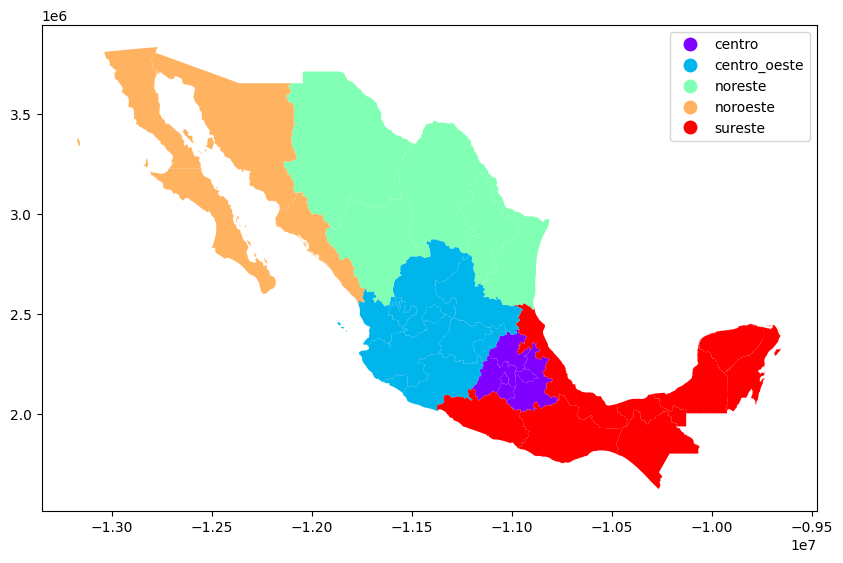

In [37]:
mex.plot(column='Region',cmap='rainbow',legend=True,figsize=(10,10))

6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.

In [10]:
Tiendas_costco1= Tiendas_costco1.set_crs(epsg=3395)
mex = mex.to_crs(epsg=3395)
print(mex.crs,Tiendas_costco1.crs,sep='\n')

EPSG:3395
EPSG:3395


Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.

<Axes: >

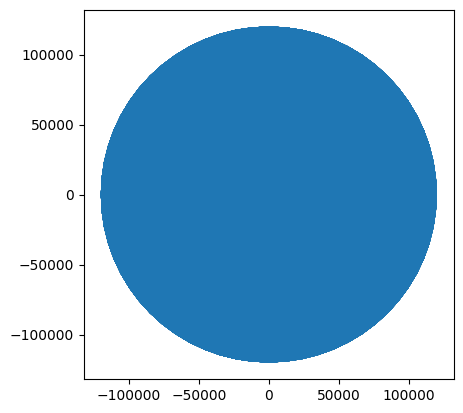

In [11]:
Tiendas_costco1['geometry'] = Tiendas_costco1.buffer(120000)
Tiendas_costco1.plot()

Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

In [14]:
interseccion= geopandas.overlay(mex,Tiendas_costco,how='intersection')

<ipython-input-15-4f54e4103fa3>:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  interseccion.plot(ax=ax,color='black',zorder=2)


Text(0.5, 1.0, 'Área de entregas a domicilo de Costco por región')

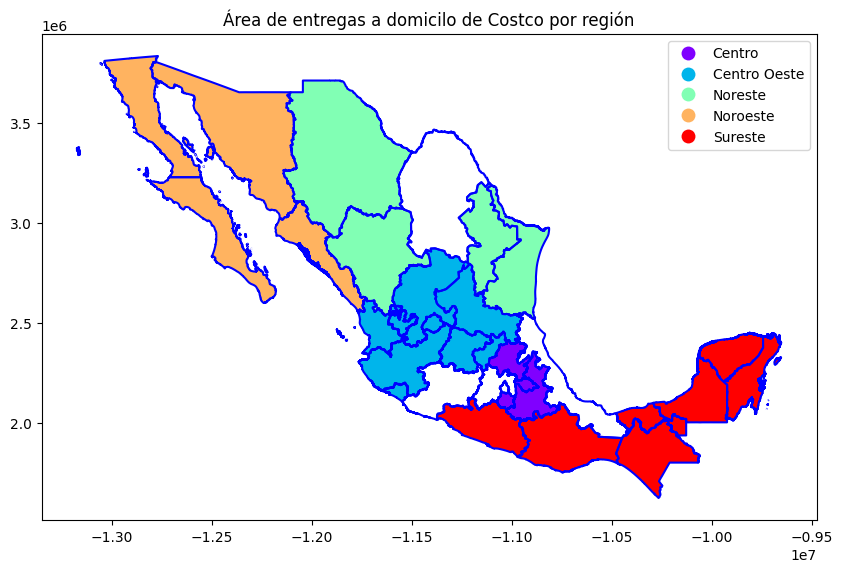

In [15]:
ax= mex.plot(column='Region',cmap='rainbow',legend=True,figsize=(10,10))
mex.boundary.plot(ax=ax,zorder=1,color='b')
interseccion.plot(ax=ax,color='black',zorder=2)
plt.title('Área de entregas a domicilo de Costco por región')